In [1]:
import pandas as pd
import seaborn as sns
import ppscore as pps
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

### Carregar e visualizar os dados

In [2]:
# Carregar os dados - Regressão
df = pd.read_csv('./datasets/dataset_colesterol.csv')

In [3]:
# Visualizar estrutura dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  1000 non-null   int64  
 1   Grupo Sanguíneo     996 non-null    object 
 2   Fumante             997 non-null    object 
 3   Nível de Atividade  996 non-null    object 
 4   Idade               997 non-null    float64
 5   Peso                997 non-null    float64
 6   Altura              997 non-null    float64
 7   Colesterol          1000 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 62.6+ KB


In [4]:
# Visualizar Dataframe
df.head(5)

,Id,Grupo Sanguíneo,Fumante,Nível de Atividade,Idade,Peso,Altura,Colesterol
0,1,B,Sim,Baixo,33.0,85.1,186.0,199.63
1,2,A,Não,Moderado,68.0,105.0,184.0,236.98
2,3,O,Não,Alto,25.0,64.8,180.0,161.79
3,4,A,Não,Alto,43.0,120.2,167.0,336.24
4,5,AB,Não,Baixo,79.0,88.5,175.0,226.23


In [5]:
# Ajustar DataFrame

df.drop('Id', axis=1, inplace=True)
df.dropna(inplace=True, axis=0)

# Aplicar OneHotEncoding nas variáveis categóricas
df = pd.get_dummies(df, columns=['Grupo Sanguíneo', 'Fumante', 'Nível de Atividade'])

In [6]:
# DataFrame atualizado
df.head(5)

,Idade,Peso,Altura,Colesterol,Grupo Sanguíneo_A,Grupo Sanguíneo_AB,Grupo Sanguíneo_B,Grupo Sanguíneo_O,Fumante_Não,Fumante_Sim,Nível de Atividade_Alto,Nível de Atividade_Baixo,Nível de Atividade_Moderado
0,33.0,85.1,186.0,199.63,0,0,1,0,0,1,0,1,0
1,68.0,105.0,184.0,236.98,1,0,0,0,1,0,0,0,1
2,25.0,64.8,180.0,161.79,0,0,0,1,1,0,1,0,0
3,43.0,120.2,167.0,336.24,1,0,0,0,1,0,1,0,0
4,79.0,88.5,175.0,226.23,0,1,0,0,1,0,0,1,0


### Calcular PPS

In [7]:
# Calcular PPS entre as variáveis
pps_matrix_reg = pps.matrix(df)
pps_matrix_reg.head(5)

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,Idade,Idade,1.0,predict_itself,True,None,0.000000,1.000000,None
1,Idade,Peso,0.0,regression,True,mean absolute error,17.004383,17.863309,DecisionTreeRegressor()
2,Idade,Altura,0.0,regression,True,mean absolute error,7.670744,7.872567,DecisionTreeRegressor()
3,Idade,Colesterol,0.0,regression,True,mean absolute error,40.340173,42.412271,DecisionTreeRegressor()
4,Idade,Grupo Sanguíneo_A,0.0,regression,True,mean absolute error,0.266055,0.394073,DecisionTreeRegressor()


In [8]:
# Ajustar Matrix para fazer o Plot
pps_matrix_reg_pivot = pps_matrix_reg[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
pps_matrix_reg_pivot.head(5)

x,Altura,Colesterol,Fumante_Não,Fumante_Sim,Grupo Sanguíneo_A,Grupo Sanguíneo_AB,Grupo Sanguíneo_B,Grupo Sanguíneo_O,Idade,Nível de Atividade_Alto,Nível de Atividade_Baixo,Nível de Atividade_Moderado,Peso
y,,,,,,,,,,,,,
Altura,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000
Colesterol,0.0,1.000000,0.111623,0.111623,0.031354,0.024745,0.002298,0.065337,0.0,0.070611,0.049683,0.0,0.478092
Fumante_Não,0.0,0.047128,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000
Fumante_Sim,0.0,0.047128,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000
Grupo Sanguíneo_A,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000


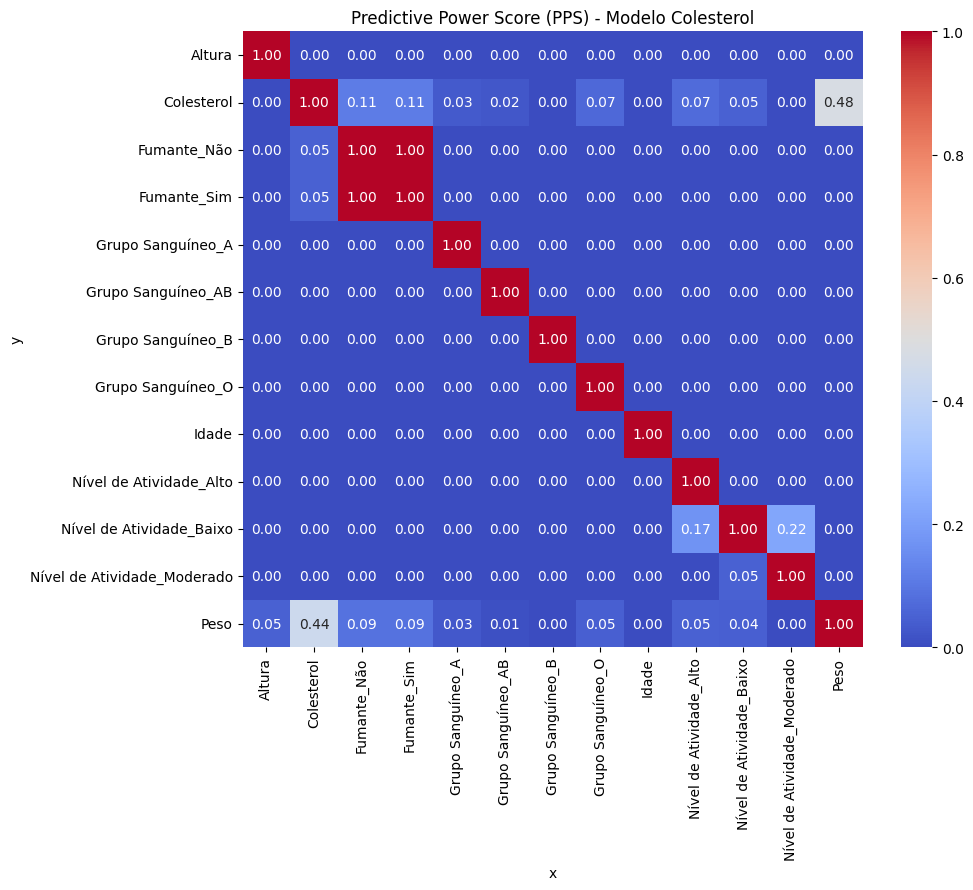

In [9]:
# Plotar a matriz do PPS
plt.figure(figsize=(10, 8))
sns.heatmap(pps_matrix_reg_pivot, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Predictive Power Score (PPS) - Modelo Colesterol')
plt.show()

In [10]:
# Calcular PPS entre 2 variáveis específicas
pps.score(df, 'Peso', 'Colesterol')

{'x': 'Peso',
 'y': 'Colesterol',
 'ppscore': 0.47809224861106603,
 'case': 'regression',
 'is_valid_score': True,
 'metric': 'mean absolute error',
 'baseline_score': 40.34017329255861,
 'model_score': 21.053849133759194,
 'model': DecisionTreeRegressor()}

### Matriz de Correlação

In [11]:
# Calcular a matriz de correlação
corr_matrix_reg = df.corr()
corr_matrix_reg

,Idade,Peso,Altura,Colesterol,Grupo Sanguíneo_A,Grupo Sanguíneo_AB,Grupo Sanguíneo_B,Grupo Sanguíneo_O,Fumante_Não,Fumante_Sim,Nível de Atividade_Alto,Nível de Atividade_Baixo,Nível de Atividade_Moderado
Idade,1.000000,-0.010143,-0.000912,-0.017584,0.046879,-0.058136,0.024710,-0.007344,-0.013057,0.013057,0.061462,-0.001858,-0.057650
Peso,-0.010143,1.000000,0.379442,0.916312,0.208950,0.135055,-0.057976,-0.282356,-0.383819,0.383819,-0.283379,0.290590,-0.038418
Altura,-0.000912,0.379442,1.000000,0.014806,-0.007243,-0.049544,0.026746,0.034064,-0.002855,0.002855,-0.019546,0.036841,-0.020770
Colesterol,-0.017584,0.916312,0.014806,1.000000,0.216368,0.182966,-0.075978,-0.321488,-0.426554,0.426554,-0.305069,0.304286,-0.032140
Grupo Sanguíneo_A,0.046879,0.208950,-0.007243,0.216368,1.000000,-0.366286,-0.241543,-0.417946,-0.066748,0.066748,-0.098666,0.058400,0.032767
Grupo Sanguíneo_AB,-0.058136,0.135055,-0.049544,0.182966,-0.366286,1.000000,-0.244066,-0.422311,-0.102263,0.102263,-0.062543,0.073395,-0.018469
Grupo Sanguíneo_B,0.024710,-0.057976,0.026746,-0.075978,-0.241543,-0.244066,1.000000,-0.278489,0.043104,-0.043104,0.039665,-0.048230,0.013528
Grupo Sanguíneo_O,-0.007344,-0.282356,0.034064,-0.321488,-0.417946,-0.422311,-0.278489,1.000000,0.128101,-0.128101,0.123098,-0.089082,-0.023383
Fumante_Não,-0.013057,-0.383819,-0.002855,-0.426554,-0.066748,-0.102263,0.043104,0.128101,1.000000,-1.000000,0.124683,-0.148753,0.039446
Fumante_Sim,0.013057,0.383819,0.002855,0.426554,0.066748,0.102263,-0.043104,-0.128101,-1.000000,1.000000,-0.124683,0.148753,-0.039446


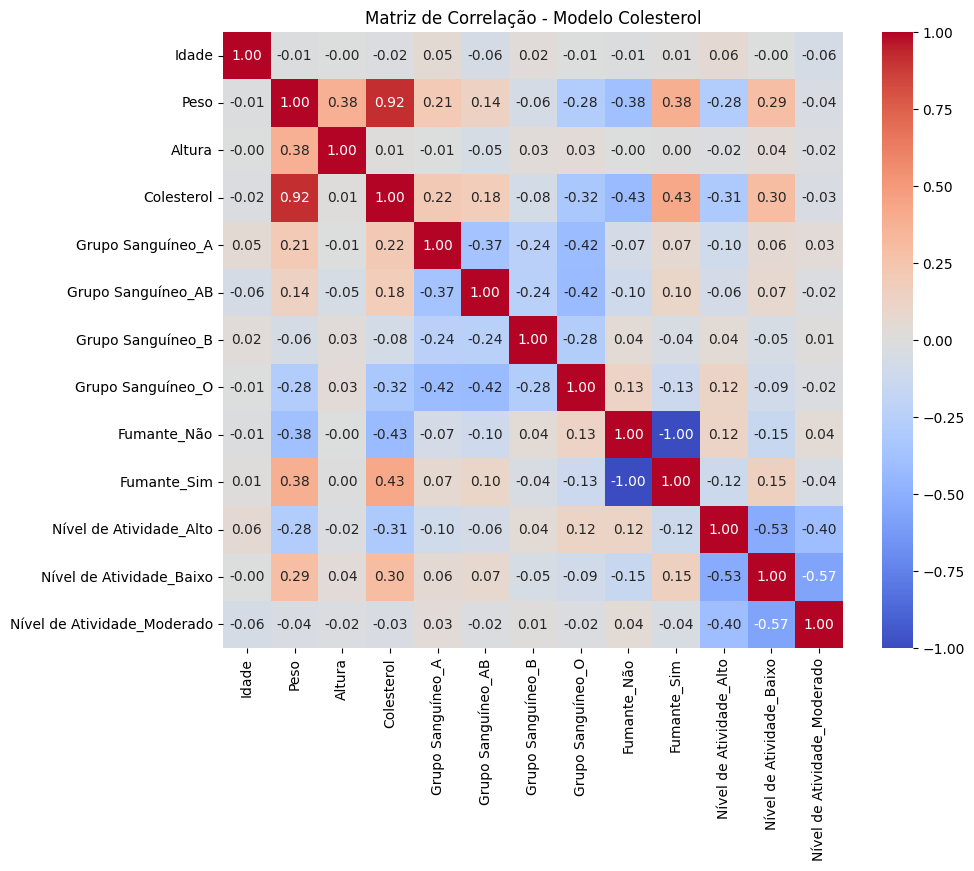

In [12]:
# Plotar a matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_reg, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação - Modelo Colesterol')
plt.show()

### Treinar Modelo Linear

In [13]:
# Separar X e y
X = df.drop('Colesterol', axis=1)
y=df['Colesterol']

In [14]:
# Treinar modelo de regressão linear múltipla
model_reg = LinearRegression()
model_reg.fit(X, y)

LinearRegression()

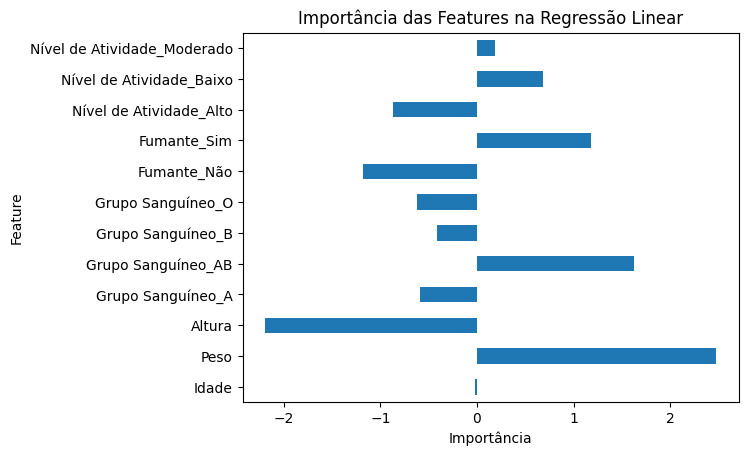

In [15]:
# Avaliar a importância das features com base nos coeficientes do modelo
feat_importance_reg = pd.Series(model_reg.coef_, index=X.columns)
feat_importance_reg.plot(kind='barh')
plt.xlabel('Importância')
plt.ylabel('Feature')
plt.title('Importância das Features na Regressão Linear')
plt.show()